<a href="https://colab.research.google.com/github/saurater/deeplearningwithsamfaraday/blob/main/Tensorflow_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

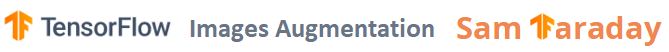

**Image augmentation** is a process of creating new training examples from the existing ones. To make new samples, you slightly change the original images by, for instance, horizontal or vertical flipping the image, rotating or zooming it just to mention a few techniques you can practise in this notebook.

**Sam Faraday**

**References**: 

**Tensorflow - Image Data Generator** at
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

**TensoFlow - Data Augmentation** at https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/data_augmentation.ipynb

**Data Monjè** at https://datamonje.com/image-data-augmentation/

**Analytics Vidhya - Image Augmentation on the fly using Keras ImageDataGenerator!** at https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

# Install wget in order to download the images files

In [1]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=cdd29e8949d6fc21e2ba965d0c7a18855c36afb6974eaa09b227a21ff3120821
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# Import Working Libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from matplotlib import pyplot

In [4]:
import numpy as np

In [5]:
import tensorflow as tf

In [6]:
import wget

In [7]:
from tensorflow.keras import layers

In [8]:

from matplotlib import pyplot as plt

In [9]:
from zipfile import ZipFile

# Download Images Files

In [10]:
wget.download("https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip",
                  out="./cats-and-dogs.zip")

'./cats-and-dogs.zip'

# Unzip Images Files

In [11]:
print("Unzipping files")
with ZipFile('./cats-and-dogs.zip', 'r') as zipObject:
    listOfFileNames = zipObject.namelist()
    for fileName in listOfFileNames:
        if fileName.startswith("PetImages"):
            zipObject.extract(fileName, "./images")

Unzipping files


# No Augmentation

Found 25000 images belonging to 2 classes.


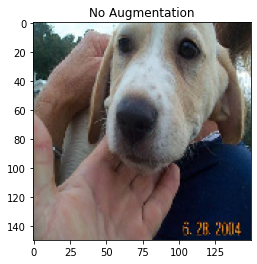

In [12]:
image_augmentor = ImageDataGenerator()
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed = 1
    )
_ = pyplot.title("No Augmentation")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

Found 25000 images belonging to 2 classes.


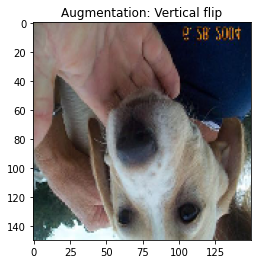

In [13]:
image_augmentor = ImageDataGenerator(vertical_flip=True)
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed = 1
    )
_ = pyplot.title("Augmentation: Vertical flip")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

# Rotation Range
Image rotation is an augmentation techniques that allows you to randomly rotate images, ranging from 0 to 360.

Found 25000 images belonging to 2 classes.


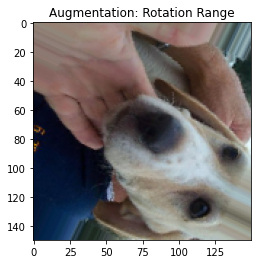

In [14]:
image_augmentor = ImageDataGenerator(rotation_range=145)
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed =1
    )
_ = pyplot.title("Augmentation: Rotation Range")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

# Width and Height Shift Range

ImageDataGenerator has height_shift_range argument for a vertical shift of image and width_shift_range for a horizontal shift of image


## Width Shift

Found 25000 images belonging to 2 classes.


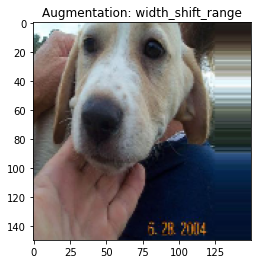

In [15]:
image_augmentor = ImageDataGenerator(width_shift_range=0.2)
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed =1
    )
_ = pyplot.title("Augmentation: width_shift_range")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

## Height Shift

Found 25000 images belonging to 2 classes.


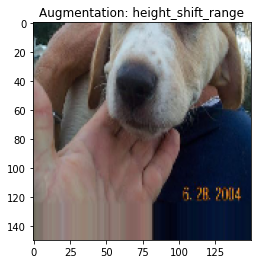

In [16]:
image_augmentor = ImageDataGenerator(height_shift_range=0.2)
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed =1
    )
_ = pyplot.title("Augmentation: height_shift_range")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

# Shear-Range
shear-range is a hyperparameter in Keras deep learning and it helps in varying the rotation of the image/s being used. This rotation, in particular, caters for the different possible views we (humans) might have of the image.

For example, imagine piping out of the window of a car to capture the image of a flower; it is most likely that such an image would be tilted to some degree. Now, if we are to use an image classifier model to determine what flower type it is, a shear_range hyperparameter would help cater for such tilt and still make the model accurate.
**(Olalemi Joshua (Josh) )**

"It is different from the rotation because in rotation we will rotate the image but in shearing, we fix one axis and stretch the image in a certain angle known as the shearing angle. This is a sort of stretching which is not observed in rotation."  (**Analytics Vidhya apud Kevin Tuei**)

Found 25000 images belonging to 2 classes.


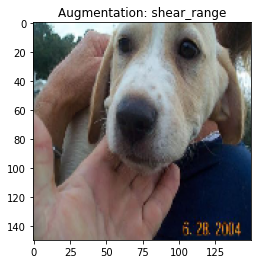

In [17]:
image_augmentor = ImageDataGenerator(shear_range=0.2)
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed =1    
)
_ = pyplot.title("Augmentation: shear_range")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

# Zoom Range

Such technique performs a random spatial zoom of a Numpy image tensor.

Found 25000 images belonging to 2 classes.


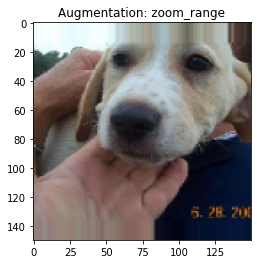

In [18]:
image_augmentor = ImageDataGenerator(zoom_range=[0.8, 1.25])
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed =1    
)
_ = pyplot.title("Augmentation: zoom_range")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

# Fill Mode
Points outside the boundaries of the input are filled according to the given mode (one of {'constant', 'nearest', 'reflect', 'wrap'}). 

*When the image is rotated, some pixels will move outside the image and leave an empty area that needs to be filled in. You can fill this in different ways like a constant value or nearest pixel values, etc. This is specified in the fill_mode argument and the default value is “nearest” which simply replaces the empty area with the nearest pixel values.* (Analytics Vidhya)

Found 25000 images belonging to 2 classes.


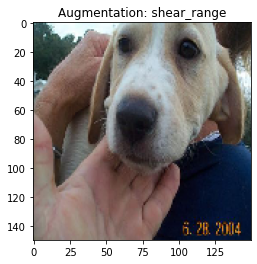

In [19]:
image_augmentor = ImageDataGenerator(fill_mode='nearest')
data = image_augmentor.flow_from_directory(
    "./images/PetImages",
    target_size=(150, 150),
    batch_size=1,
    seed =1    
)
_ = pyplot.title("Augmentation: shear_range")
_ = pyplot.imshow(data.next()[0][0].astype('int'))

# Neural Network Layers for Image Augmentation

Instead of using DataGenerator to augment images, we can use keras layers to do that

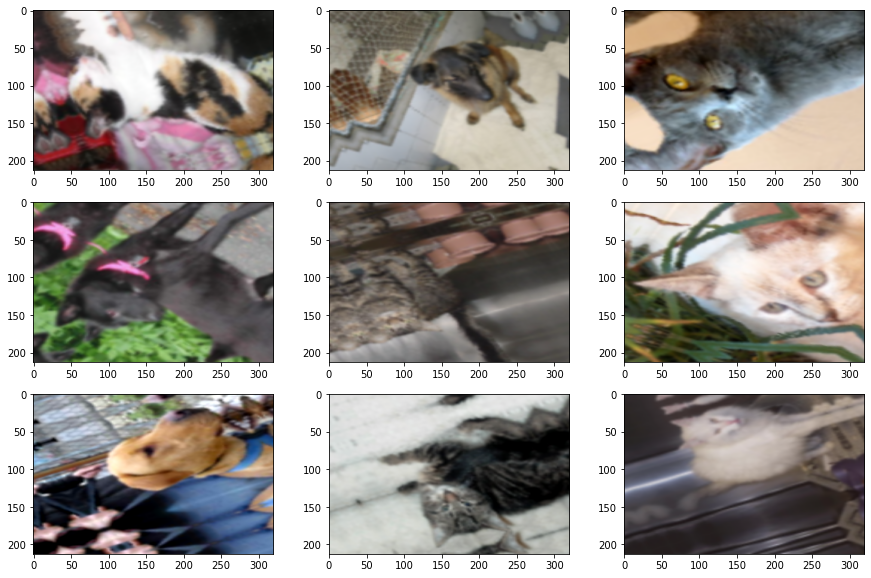

In [27]:
augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
  layers.experimental.preprocessing.RandomHeight(0.1),
  layers.experimental.preprocessing.RandomWidth(0.1),
  layers.experimental.preprocessing.RandomZoom(0.25),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.5),
  layers.experimental.preprocessing.Resizing(213, 320)
])

plt.figure(figsize=(15, 10))
for i in range(9):
  augmented_image = augmentation(data.next()[0])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(np.array(augmented_image[0]).astype('int'))